In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.colors as mcol
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams['font.family'] = 'Arial'

In [26]:
df = pd.read_csv('o3_budget_studies.csv').sort(['Year'])

In [27]:
df

,Burden,Burden_error,Production,Production_error,Authors,Year,Type
12,333,NaN,NaN,NaN,Fortuin and Kelder,1998,obs
13,327,NaN,NaN,NaN,Logan,1999,obs
8,372,NaN,5042,NaN,Horowitz,2006,mod
9,349,NaN,4384,NaN,Liao et al.,2006,mod
10,344,39,5110,606,Stevenson et al.,2006,mod
7,319,NaN,4487,NaN,Wu et al.,2007,mod
11,314,33,4465,514,Wild,2007,mod
5,324,NaN,4870,NaN,Wild and Palmer,2008,mod
6,314,NaN,NaN,NaN,Zeng et al.,2008,mod
15,335,16,NaN,NaN,Osterman et al.,2008,obs


Now, let's visualise the data using matplotlib's bar plot

In [33]:
clr1 = [mcol.hex2color(i) for i in ['#348ABD', '#FF9933']]
clr2 = [mcol.hex2color(i) for i in ['#15374C', '#B26B24']]
width = 0.35
error_kw1 = dict(ecolor='#5F5F5F', lw=2, capsize=5, capthick=2)
error_kw2 = dict(ecolor='#FAFAFA', lw=2, capsize=5, capthick=2)

In [34]:
inds = np.arange(len(df))

In [35]:
barcolors1 = [clr1[0] if df['Type'].str.match('mod').values[i] else clr1[1] for i in inds]
barcolors2 = [clr2[0] if df['Type'].str.match('mod').values[i] else clr2[1] for i in inds]

In [41]:
ylabs = [i+' ({})'.format(j) for i,j in zip(df['Authors'],df['Year'])]

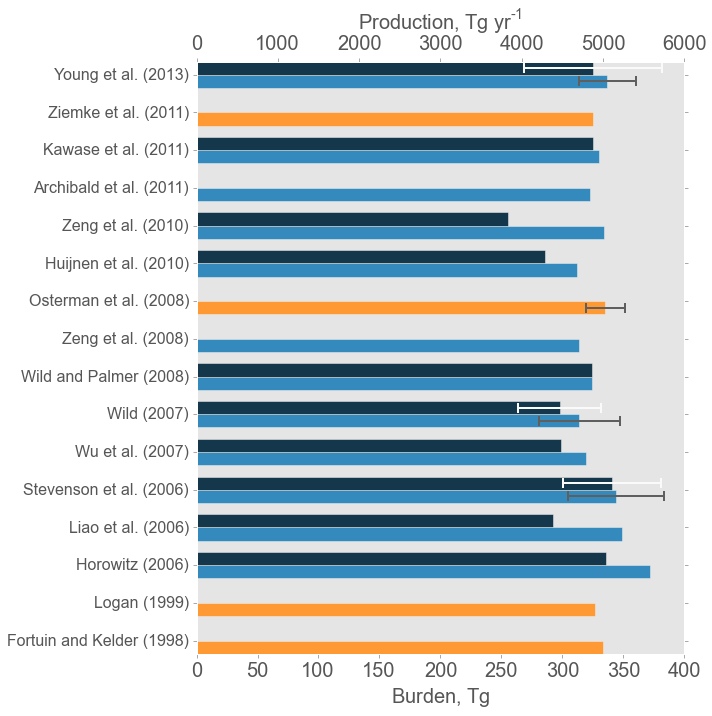

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

brdn = ax.barh(inds, df['Burden'], width, color=barcolors1, 
              xerr=df['Burden_error'], error_kw=error_kw1)
ax.grid('off')
ax.set_xlabel('Burden, $Tg$', fontsize=20)
ax.set_yticks(inds+width)
ax.set_yticklabels(ylabs,fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=20)

ax2 = ax.twiny() 
prod = ax2.barh(inds+width, df['Production'], width, color=barcolors2, 
               xerr=df['Production_error'], error_kw=error_kw2)
ax2.grid('off')
_ = ax2.set_xlabel('Production, $Tg$ $yr^{-1}$', fontsize=20)
ax2.tick_params(axis='x', which='major', labelsize=20)

plt.tight_layout()

In [45]:
fig.savefig('o3_studies.pdf')